## Validação de agrupamento



###Fazer as importações necessárias


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.datasets import make_blobs

### Índice Rand Corrigido

In [2]:
#Calcular Indice Rand corrigido
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

sm.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243

In [3]:
#Se permutar 0 e 1 e trocar 2 por 3 o resultado não se altera
labels_pred = [1, 1, 0, 0, 3, 3]
sm.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243

In [4]:
#O calculo de RC é simétrico
sm.adjusted_rand_score(labels_pred, labels_true)

0.24242424242424243

### Índice AMI

In [5]:
#Calcular o AMI para o conjunto definido
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
sm.adjusted_mutual_info_score(labels_pred, labels_true ,average_method='arithmetic')


0.2987924581708903

In [6]:
#Agrupamentos muito diferentes – índice zero
sm.adjusted_mutual_info_score([0, 0, 0, 0], [0, 1, 2, 3], average_method ='arithmetic')


0.0

In [7]:
#Agrupamentos idênticos – índice 1
sm.adjusted_mutual_info_score([0, 0, 1, 1], [0, 0, 1, 1],average_method='arithmetic')


1.0

### Homogeneidade, Completeza, Índice V

In [8]:
#Calcular homogeneidade, completeza e medida V para o conjunto definido
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
print("Homogeneidade: %0.3f " % sm.homogeneity_score(labels_true, labels_pred))
print("Completeza: %0.3f " %  sm.completeness_score(labels_true, labels_pred))
print("Medida-V %0.3f " % sm.v_measure_score(labels_true, labels_pred))


Homogeneidade: 0.667 
Completeza: 0.421 
Medida-V 0.516 


In [9]:
# As medidas de homogeneidade, completeza e medida V podem ser calculadas de uma só vez:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
sm.homogeneity_completeness_v_measure(labels_true, labels_pred)


(0.6666666666666669, 0.420619835714305, 0.5158037429793889)

Text(0, 0.5, 'x2')

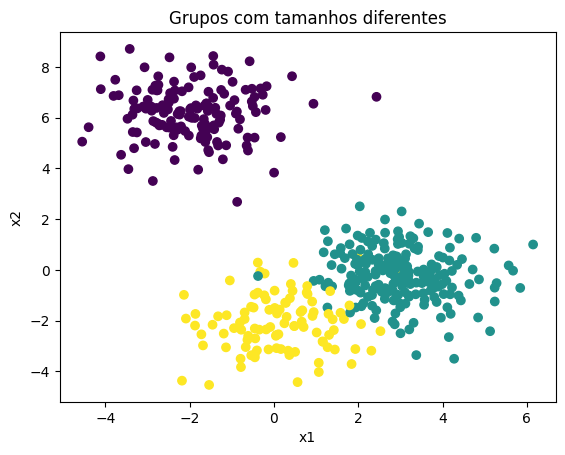

In [13]:
#Gerar conjunto de dados com makeblobs

#gerando grupos com tamanhos diferentes
X, y = make_blobs(n_samples=[150,200,100])

plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Grupos com tamanhos diferentes")
plt.xlabel("x1")
plt.ylabel("x2")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'x2')

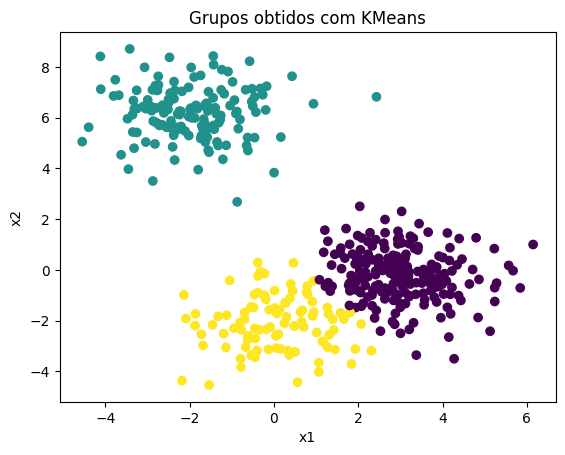

In [14]:
# agrupando com KMeans
km = KMeans(n_clusters = 3)
km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km.labels_)
plt.title("Grupos obtidos com KMeans")
plt.xlabel("x1")
plt.ylabel("x2")

In [15]:
#Calcular índices de validação externos do agrupamento com KMeans
labels_true = y
rotulos_km = km.labels_
h = sm.homogeneity_score(labels_true, rotulos_km)
print("Homogeneidade: %0.3f" % h)
c = sm.completeness_score(labels_true, rotulos_km)
print("Completeza: %0.3f" % c)
v = sm.v_measure_score(labels_true, rotulos_km)
print("Medida V: %0.3f" % v )
ari = sm.adjusted_rand_score(labels_true, rotulos_km)
print("Índice Rand corrigido: %0.3f" % ari)
ami = sm.adjusted_mutual_info_score(labels_true, rotulos_km, average_method='arithmetic')
print("Adjusted Mutual Information: %0.3f"  % ami )
fm = sm.fowlkes_mallows_score(labels_true, rotulos_km)
print("Índice Fowlkes-Mallows: %0.3f"  % fm )

Homogeneidade: 0.916
Completeza: 0.917
Medida V: 0.917
Índice Rand corrigido: 0.944
Adjusted Mutual Information: 0.916
Índice Fowlkes-Mallows: 0.964


### Índices internos - Silhueta, Calinski-Harabaz, Davies-Bouldin

Text(0, 0.5, 'x2')

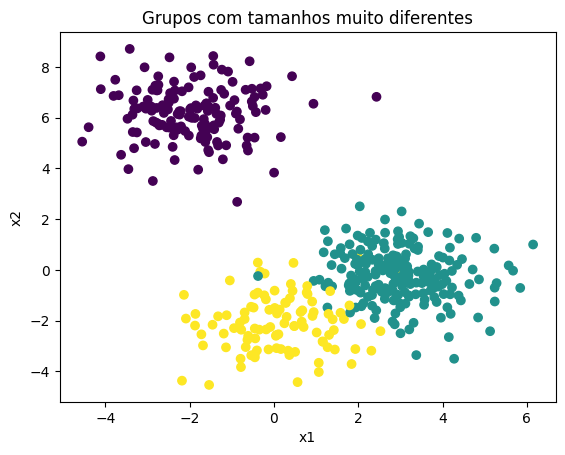

In [19]:
#gerando grupos com tamanhos diferentes
X1, y1 = make_blobs(n_samples=[300,100,50])
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Grupos com tamanhos muito diferentes")
plt.xlabel("x1")
plt.ylabel("x2")

In [20]:
# Executando KMeans e mostrando os centros obtidos
y_pred1 = KMeans(n_clusters=3,init='random')
y_pred1.fit(X1)
y_pred1.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-2.93276023,  3.06854538],
       [ 6.63545611,  5.77812793],
       [-7.47148901,  7.1506339 ]])

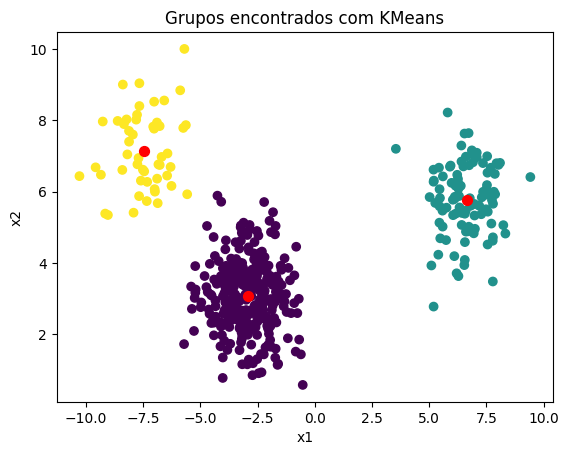

In [21]:
#Usando os rótulos dos grupos para plotar os grupos obtidos com os centróides
rotulos= y_pred1.labels_
plt.scatter(X1[:,0], X1[:,1], c=rotulos)
plt.title("Grupos encontrados com KMeans")
plt.xlabel("x1")
plt.ylabel("x2")
centros1 = y_pred1.cluster_centers_
centros1
plt.scatter(centros1[:,0],centros1[:,1],s=50,c="r")

In [22]:
#Calcular índices internos para o agrupamento resultante
s= sm.silhouette_score(X, rotulos, metric='euclidean')
print("Coeficiente de Silhueta: %0.3f" % s)
ch = sm.calinski_harabasz_score(X, rotulos)
print("Calinski_harabasz: %0.3f" % ch)
dbs = sm.davies_bouldin_score(X, rotulos)
print("Davies Bouldin: %0.3f" % dbs)


Coeficiente de Silhueta: -0.032
Calinski_harabasz: 1.158
Davies Bouldin: 17.520


In [23]:
#importar o módulo para carregar a base de dados de vinho do scikit-learn
from sklearn.datasets import load_wine
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
X_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
from sklearn.preprocessing import MinMaxScaler
#normalizar os atributos contínuos com MinMaxScaler()
mms = MinMaxScaler()

#normalizar atributos contínuos do conjunto de dados wine
mms.fit(X_wine)
X_wine_transformed = mms.transform(X_wine)
X_wine_transformed

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [26]:
#Agrupar com KMeans e mostrar os centros obtidos
km = KMeans(n_clusters = 3)
km = km.fit(X_wine_transformed)
centers = km.cluster_centers_
y_pred = km.labels_
print(centers)
print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.31336675 0.23561704 0.47304983 0.50024546 0.24551415 0.44805692
  0.38008171 0.41868823 0.39717591 0.14778699 0.47218996 0.58422001
  0.15637525]
 [0.70565142 0.24842869 0.58490401 0.3444313  0.41072701 0.64211419
  0.55467939 0.30034024 0.47727155 0.35534046 0.47780888 0.69038612
  0.59389397]
 [0.54668616 0.48440931 0.56159636 0.53865979 0.31521739 0.2467433
  0.10474293 0.61425577 0.22543521 0.48878144 0.18888889 0.15852666
  0.24911502]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 0 0 0 0 0 0 2 0 2 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


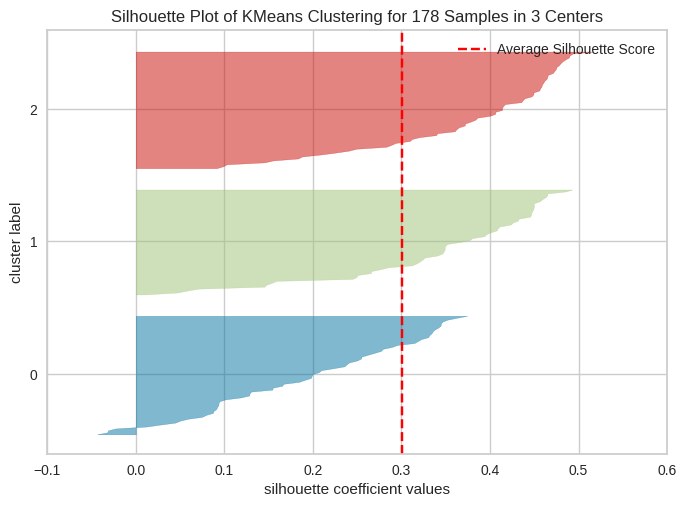

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_wine_transformed)
visualizer.show();


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


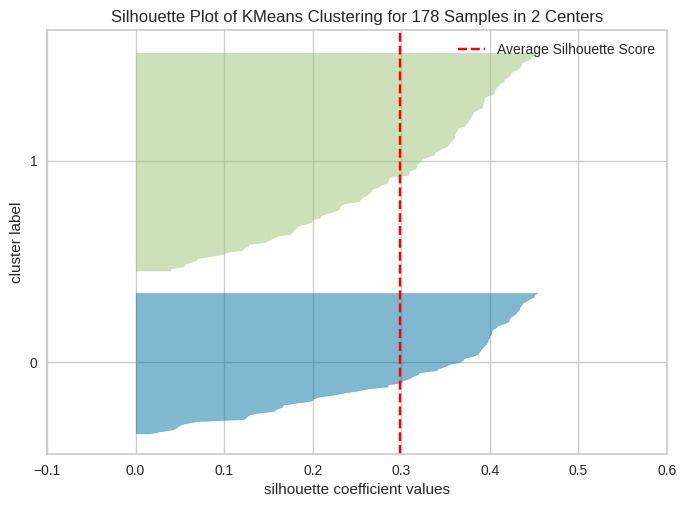

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski_harabasz: 1.158
Davies Bouldin: 17.520


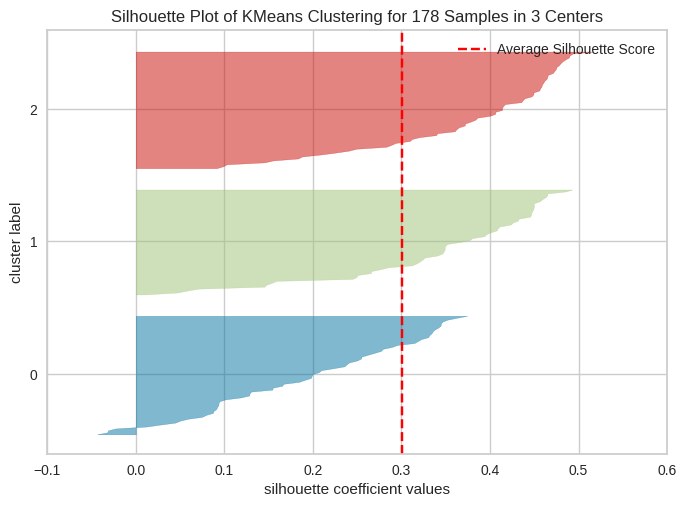

Calinski_harabasz: 1.158
Davies Bouldin: 17.520


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


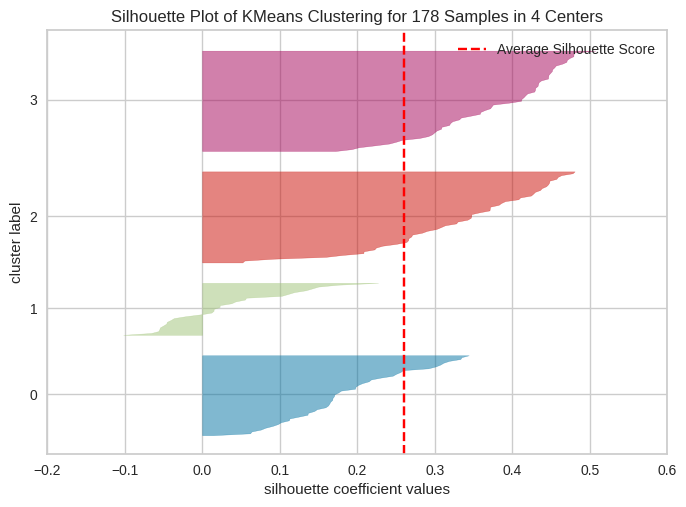

Calinski_harabasz: 1.158
Davies Bouldin: 17.520


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


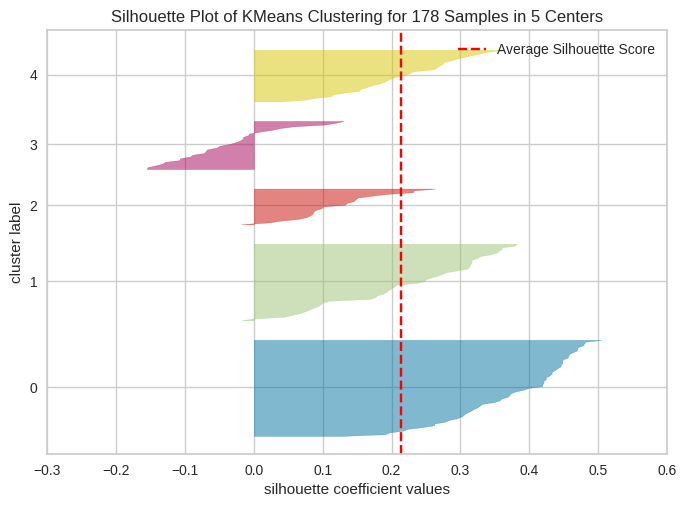

Calinski_harabasz: 1.158
Davies Bouldin: 17.520


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


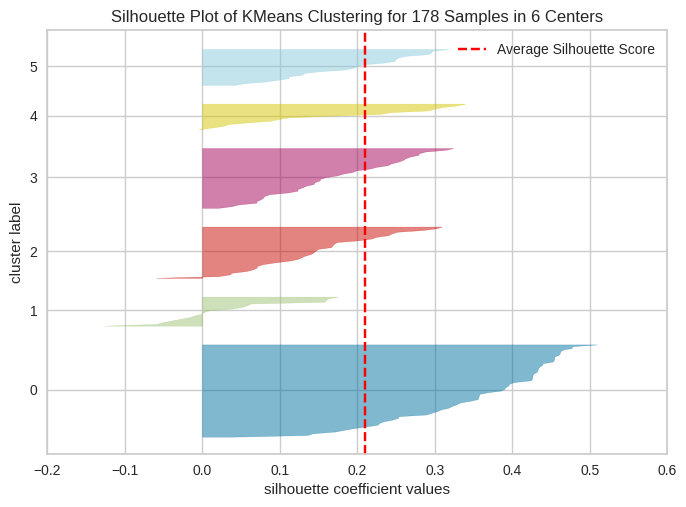

Calinski_harabasz: 1.158
Davies Bouldin: 17.520


In [29]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X_wine_transformed)
    visualizer.show();
    #Calcular índices internos para o agrupamento resultante
    ch = sm.calinski_harabasz_score(X, rotulos)
    print("Calinski_harabasz: %0.3f" % ch)
    dbs = sm.davies_bouldin_score(X, rotulos)
    print("Davies Bouldin: %0.3f" % dbs)


In [ ]:
#Ler o conjunto de dados Wholesale_customers_data.csv do diretório local
# Quando aparecer o campo <Selecionar arquivo>, selecionar o arquivo do diretório local
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [ ]:
import io
# df.head() mostra as 5 primeiras linhas do arquivo
df = pd.read_csv(io.StringIO(uploaded['Wholesale customers data.csv'].decode('utf-8')))
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#Definir a lista de atributos categóricos e atributos contínuos

categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

#Transformar atributos categóricos em binários com a função get_dummies()
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [ ]:
#normalizar os atributos contínuos com MinMaxScaler()
mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)
df_transformed = pd.DataFrame(df_transformed)
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,1.0,0.0,0.0,1.0
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,1.0,0.0,0.0,1.0
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,1.0,0.0,0.0,1.0
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1.0,0.0,0.0,0.0,1.0
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,1.0,0.0,0.0,1.0


In [ ]:
K = range(2,6)

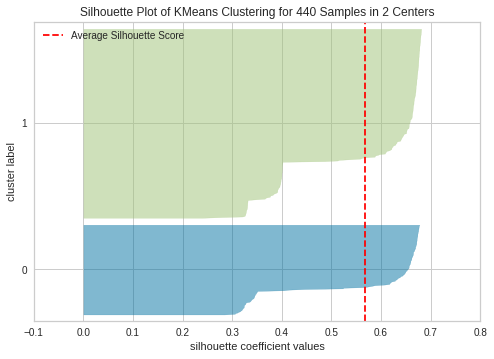

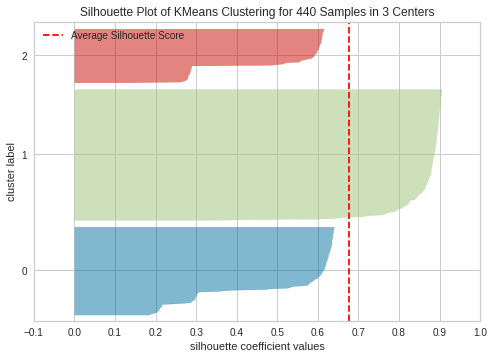

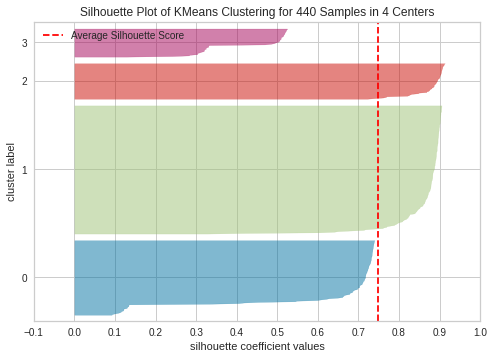

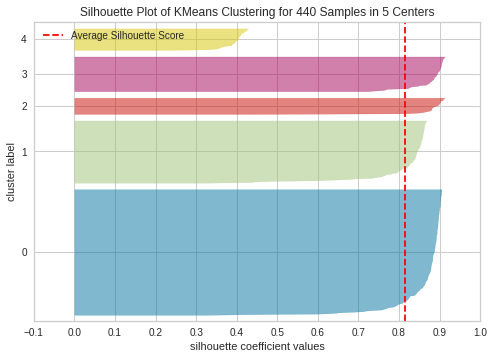

In [ ]:
for k in K:
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(df_transformed)
    visualizer.show();# Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig.set_size_inches(18, 7)
   # Sum_of_squared_distances = []
#for k in K:
    #km = KMeans(n_clusters=k)
    #km = km.fit(df_transformed)
    #Sum_of_squared_distances.append(km.inertia_)